<a href="https://colab.research.google.com/github/TimurMMD/Dissertation_Thesis/blob/main/Dataset_featuring_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
import zipfile
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [14]:
# Preprocessing libraries
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor


In [4]:
# Define the file name you uploaded
zip_file = '/content/financial_data_refine.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('/content/csv_files')

# Check files
os.listdir('/content/csv_files')

['HWM_final.csv',
 'RL_final.csv',
 'TSN_final.csv',
 'SBAC_final.csv',
 'CHD_final.csv',
 'RF_final.csv',
 'CLX_final.csv',
 'SPGI_final.csv',
 'VTRS_final.csv',
 'UDR_final.csv',
 'PFG_final.csv',
 'FCX_final.csv',
 'APD_final.csv',
 'MO_final.csv',
 'NWSA_final.csv',
 'KMX_final.csv',
 'PFE_final.csv',
 'GE_final.csv',
 'COO_final.csv',
 'BIIB_final.csv',
 'ROK_final.csv',
 'EQR_final.csv',
 'MHK_final.csv',
 'GIS_final.csv',
 'BMY_final.csv',
 'PEP_final.csv',
 'MNST_final.csv',
 'FI_final.csv',
 'CBRE_final.csv',
 'GOOG_final.csv',
 'HBAN_final.csv',
 'HPQ_final.csv',
 'NOC_final.csv',
 'CSX_final.csv',
 'URI_final.csv',
 'VZ_final.csv',
 'NUE_final.csv',
 'AVGO_final.csv',
 'JCI_final.csv',
 'ROST_final.csv',
 'WELL_final.csv',
 'ALGN_final.csv',
 'RVTY_final.csv',
 'BKNG_final.csv',
 'EXC_final.csv',
 'DOC_final.csv',
 'ADI_final.csv',
 'INTC_final.csv',
 'EMN_final.csv',
 'DVA_final.csv',
 'SYY_final.csv',
 'WMT_final.csv',
 'XYL_final.csv',
 'ABT_final.csv',
 'BALL_final.csv',

In [5]:
# Specify the path to the folder where the CSVs are located
path = '/content/csv_files'

# Get all CSV file paths with *_final.csv pattern
all_files = glob.glob(path + "/*_final.csv")

# Combine all CSVs into one DataFrame, adding the 'ticker' column
combined_df = pd.concat((pd.read_csv(f).assign(ticker=f.split('/')[-1].split('_final')[0]) for f in all_files), ignore_index=True)

# Check the combined dataset
print(combined_df.head())

         date  freeCashFlow  current_ratio  quick_ratio  debt_to_equity  \
0  2020-03-31  -360000000.0       1.691746     1.080107        2.857621   
1  2020-06-30    -1000000.0       2.232811     1.223764        2.294578   
2  2020-09-30    -1000000.0       2.282815     1.273304        2.238789   
3  2020-12-31   104000000.0       2.212048     1.315663        2.197207   
4  2021-03-31   -61000000.0       1.980952     1.116071        1.995904   

   interest_coverage_ratio  gross_profit_margin  operating_income_margin  \
0                 4.428571             0.228420                 0.124338   
1                 1.131944             0.263368                 0.059058   
2                 1.129870             0.206349                 0.064374   
3                 3.039474             0.295638                 0.178514   
4                 2.750000             0.277916                 0.156328   

   net_profit_margin       ROA       ROE  asset_turnover_ratio  \
0           0.066999  0.01

In [ ]:
# Check the structure of the DataFrame
combined_df

,date,freeCashFlow,current_ratio,quick_ratio,debt_to_equity,interest_coverage_ratio,gross_profit_margin,operating_income_margin,net_profit_margin,ROA,ROE,asset_turnover_ratio,operating_cash_flow_to_total_debt,close,PE,revenue_growth,earnings_growth,return,ticker
0,2020-03-31,410700000.0,1.685602,1.033892,1.147458,9.063904,0.726931,-0.255634,-0.285066,-0.019931,-0.042808,0.069918,0.062321,101.0019,59.412882,-0.160841,-2.585594,-0.324692,ZBH
1,2020-06-30,-71800000.0,2.177864,1.022719,1.030900,0.795350,0.653780,-0.140038,-0.168502,-0.008737,-0.017743,0.051849,-0.007044,119.2678,2385.356000,-0.312647,-0.593707,0.180847,ZBH
2,2020-09-30,350700000.0,2.273674,1.173948,1.023172,10.993468,0.704867,0.155082,0.125693,0.010093,0.020426,0.080302,0.052097,136.0348,75.157348,0.573526,-2.173766,0.140583,ZBH
3,2020-12-31,397000000.0,1.988071,1.029606,1.001549,8.230600,0.689589,0.115427,0.160025,0.013666,0.027354,0.085401,0.058039,153.9709,72.971991,0.080858,0.376082,0.131849,ZBH
4,2021-03-31,219100000.0,2.393079,1.190964,0.929878,11.027625,0.720472,0.143770,0.107232,0.008245,0.015912,0.076890,0.034648,159.9563,93.541696,-0.114084,-0.406353,0.038874,ZBH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7399,2023-06-30,321000000.0,1.085751,0.839277,0.913338,4.657658,0.259322,0.110164,0.074366,0.009869,0.018939,0.132713,0.045206,195.7700,65.915825,0.049653,0.035608,-0.002395,LHX
7400,2023-09-30,395000000.0,0.884343,0.691228,1.266491,3.515723,0.265921,0.113733,0.077925,0.009056,0.020574,0.116213,0.039425,174.1200,54.583072,0.047304,0.097421,-0.110589,LHX
7401,2023-12-31,652000000.0,0.988506,0.804598,1.218119,4.643275,0.263109,0.104307,0.029588,0.003790,0.008420,0.128097,0.058925,210.6200,62.871642,0.086470,-0.587467,0.209626,LHX
7402,2024-03-31,-219000000.0,0.961953,0.787010,1.236794,2.375000,0.220879,0.080215,0.054308,0.006768,0.015161,0.124617,-0.007860,213.1000,69.640523,-0.024157,0.791139,0.011775,LHX


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7404 entries, 0 to 7403
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               7404 non-null   object 
 1   freeCashFlow                       7404 non-null   float64
 2   current_ratio                      7391 non-null   float64
 3   quick_ratio                        7391 non-null   float64
 4   debt_to_equity                     7392 non-null   float64
 5   interest_coverage_ratio            7392 non-null   float64
 6   gross_profit_margin                7394 non-null   float64
 7   operating_income_margin            7394 non-null   float64
 8   net_profit_margin                  7394 non-null   float64
 9   ROA                                7396 non-null   float64
 10  ROE                                7396 non-null   float64
 11  asset_turnover_ratio               7396 non-null   float

In [ ]:
combined_df.to_csv('combined_dataset.csv')

In [6]:
# Split into training (data before 2024) and testing (data from 2024 onwards)
train_df = combined_df[combined_df['date'] < '2024-01-01']
test_df = combined_df[combined_df['date'] >= '2024-01-01']

In [7]:
# Filling missing alue in the data
train_df.fillna(0)
test_df.fillna(0)

,date,freeCashFlow,current_ratio,quick_ratio,debt_to_equity,interest_coverage_ratio,gross_profit_margin,operating_income_margin,net_profit_margin,ROA,ROE,asset_turnover_ratio,operating_cash_flow_to_total_debt,close,PE,revenue_growth,earnings_growth,return,ticker
16,2024-03-31,9.500000e+07,1.967020,0.916961,1.547724,7.530612,0.256031,0.202303,0.133224,0.023343,0.059471,0.175216,0.053555,68.43,120.052632,0.053726,0.029661,0.264412,HWM
17,2024-06-30,3.420000e+08,1.527990,0.744275,1.496844,8.571429,0.278723,0.223404,0.141489,0.024909,0.062193,0.176046,0.129569,77.63,115.865672,0.030702,0.094650,0.134444,HWM
34,2024-03-31,8.110000e+07,2.289940,1.675027,1.694609,11.534483,0.627910,0.085337,0.057848,0.013737,0.037016,0.237467,0.119766,187.76,109.801170,-0.189297,-0.672090,0.302080,RL
35,2024-06-30,2.439000e+08,2.191090,1.530757,1.805661,19.605505,0.667372,0.141317,0.111493,0.025388,0.071229,0.227707,0.253497,175.06,64.837037,-0.035525,0.858875,-0.067640,RL
52,2024-03-31,-3.900000e+08,1.769217,0.871649,1.063740,2.828829,0.066248,0.023868,0.011092,0.003870,0.008016,0.348912,-0.014012,58.73,94.725806,-0.018545,0.355140,0.092651,TSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,2024-06-30,-1.659310e+08,0.899217,0.580121,3.236950,1.960204,0.298196,0.192181,0.017515,0.000824,0.003498,0.047057,0.037428,107.00,55.729167,0.056892,-0.324083,0.012491,ETR
7384,2024-03-31,8.640000e+08,1.006171,1.006171,4.005793,4.547718,0.697913,0.401318,0.280850,0.005837,0.029231,0.020784,0.049904,137.43,92.858108,0.024381,1.056300,0.070077,ICE
7385,2024-06-30,1.031000e+09,0.994592,0.994592,4.157005,4.626609,0.701379,0.391147,0.229318,0.004590,0.023682,0.020017,0.059821,136.89,90.059211,0.009154,-0.176010,-0.003929,ICE
7402,2024-03-31,2.407000e+09,0.690972,0.631715,0.920354,5.952096,0.358239,0.135036,-0.000906,-0.000103,-0.000202,0.113182,0.092426,122.36,101.123967,-0.062253,-1.010466,0.355189,DIS


In [8]:
train_df = train_df.drop(['date', 'ticker', 'close'], axis=1)
test_df = test_df.drop(['date', 'ticker', 'close'], axis=1)

In [9]:
# Replace infinite values with NaN
train_df = train_df.replace([np.inf, -np.inf], np.nan)
test_df = test_df.replace([np.inf, -np.inf], np.nan)

# Filling missing values in the data
train_df = train_df.fillna(0) # Assign the result back to train_df
test_df = test_df.fillna(0)  # Assign the result back to test_df

In [10]:
# Scale data to not reevalute the feature importance
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [11]:
# For training, drop the columns 'return', 'date', and 'ticker'
X_train = train_df.drop(['return'], axis=1)
y_train = train_df['return']

# For testing, drop the same columns
X_test = test_df.drop(['return'], axis=1)
y_test = test_df['return']

# Check the shapes of the training and testing sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (6510, 15), (6510,)
Test set: (894, 15), (894,)


# **Machine Learning Training**

In [11]:
# test options for regression
num_folds = 10
scoring = 'r2'

In [13]:
# spot check the algorithms
models = []
#models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
#models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))
#Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [13]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASSO: 0.000895 (0.002437)
EN: 0.006283 (0.017240)
KNN: 0.232244 (0.112463)
SVR: 0.000470 (0.013096)
ABR: 0.280812 (0.861321)
GBR: -0.017108 (0.031819)
RFR: -0.042230 (0.029565)
ETR: -0.033835 (0.021965)


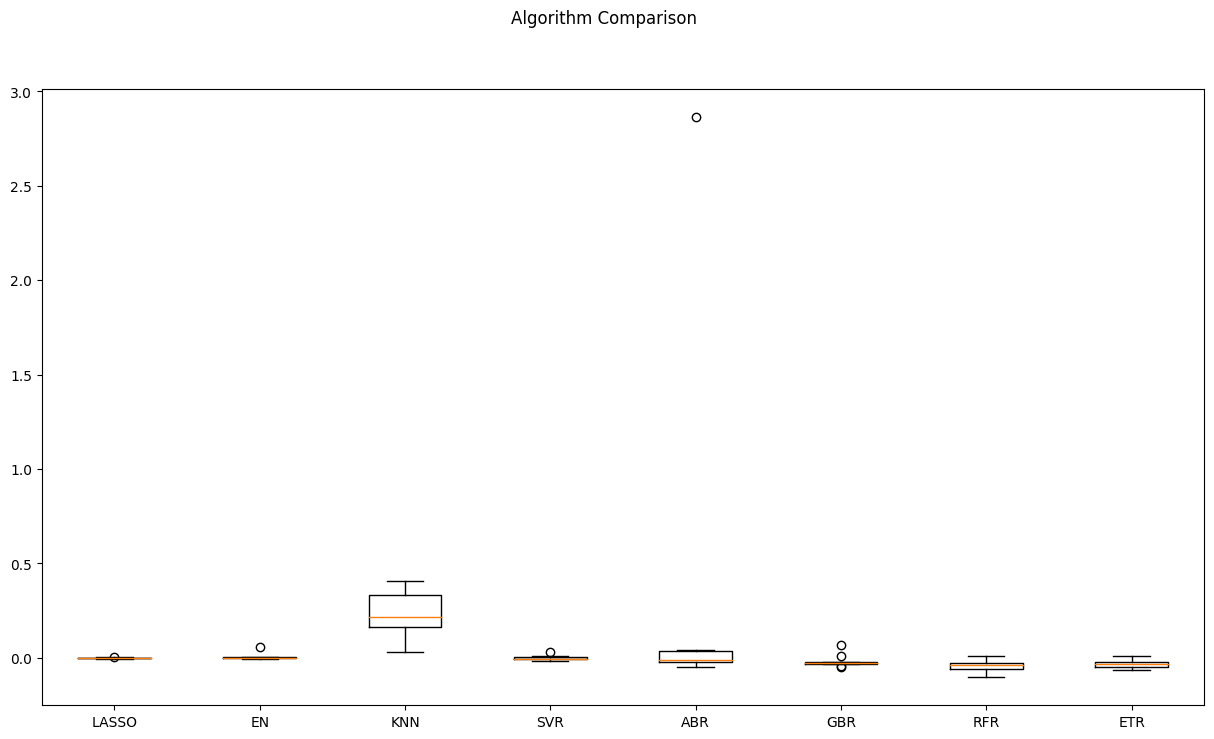

In [14]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

Better to use SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best model
best_model = grid_search.best_estimator_


In [ ]:
# Step 1: Initialize SVR with a linear kernel
svr_linear = SVR(kernel='linear')

# Step 2: Define the parameter grid for C and epsilon
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'epsilon': [0.0001, 0.001, 0.01, 0.1, 1, 5]
}

# Step 3: Initialize GridSearchCV with SVR and the parameter grid
grid_search_svr = GridSearchCV(estimator=svr_linear, param_grid=param_grid, scoring='r2', cv=5, verbose=1)

# Step 4: Fit the model with your training data
grid_search_svr.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best score
print(f"Best parameters: {grid_search_svr.best_params_}")
print(f"Best R² score: {grid_search_svr.best_score_}")

# Step 6: Predict using the best estimator and calculate the R² score on the test set
best_svr = grid_search_svr.best_estimator_
y_pred = best_svr.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [17]:
# Step 2: Initialize the SVM model with the best parameters
best_model = SVR(kernel='rbf', C=0.1, gamma='scale', epsilon=0.1)  # Example, replace with your best parameters

# Step 3: Fit the model to the training data
best_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = best_model.predict(X_test)

# Step 5: Calculate the R² score
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2}")

R² score: -0.004024965039281181


In [20]:
# Step 2: Initialize the SVM model with the best parameters
best_model = SVR(kernel='rbf', C=0.1, gamma='auto', epsilon=0.01)  # Example, replace with your best parameters

# Step 3: Fit the model to the training data
best_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = best_model.predict(X_test)

# Step 5: Calculate the R² score
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2}")

R² score: -0.0011075766444879065


In [18]:
# Step 2: Initialize the SVM model with the best parameters
best_model = SVR()  # Example, replace with your best parameters

# Step 3: Fit the model to the training data
best_model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = best_model.predict(X_test)

# Step 5: Calculate the R² score
r2 = r2_score(y_test, y_pred)

print(f"R² score: {r2}")

R² score: -0.011953974303605452


In [12]:
# Step 2: Initialize the Lasso regression model
lasso = Lasso()

# Step 3: Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Different values for the regularization strength
}

# Step 4: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5, verbose=1)

# Step 5: Fit the GridSearchCV with the training data
grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_}")

# Step 7: Evaluate the model using the test data
best_lasso = grid_search.best_estimator_

# Predict the values
y_pred = best_lasso.predict(X_test)

# Calculate the R² score on the test data
r2 = r2_score(y_test, y_pred)

print(f"R² score on the test set: {r2}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'alpha': 10}
Best R² score: -0.00025078748857374487
R² score on the test set: -0.002862227906502479


In [13]:
# Step 1: Initialize ElasticNet model
elastic_net = ElasticNet()

# Step 2: Define the parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # L1 to L2 ratio
}

# Step 3: Initialize GridSearchCV with ElasticNet and the parameter grid
grid_search_elasticnet = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=5, verbose=1)

# Step 4: Fit the model with your training data
grid_search_elasticnet.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and best score
print(f"Best parameters: {grid_search_elasticnet.best_params_}")
print(f"Best R² score: {grid_search_elasticnet.best_score_}")

# Step 6: Predict using the best estimator and calculate the R² score on the test set
best_elastic_net = grid_search_elasticnet.best_estimator_
y_pred = best_elastic_net.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+01, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+02, tolerance: 2.080e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+02, tolerance: 2.101e

Best parameters: {'alpha': 10, 'l1_ratio': 0.3}
Best R² score: -0.0002314247231503197
R² score on test data: -0.002716281338301041


In [14]:
import xgboost as xgb


# Initialize XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f'XGBoost R² Score: {r2}')



XGBoost R² Score: -0.3415750925995584


In [15]:
# GridSearchCV for Hyperparameter Tuning
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1]
}

grid_xgb = GridSearchCV(xg_reg, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best parameters:", grid_xgb.best_params_)
print(f"Best R² score: {grid_xgb.best_score_}")

# Step 6: Predict using the best estimator and calculate the R² score on the test set

y_pred = grid_xgb.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best R² score: 0.04184835205027777
R² score on test data: -0.053811404359813686


In [16]:
import lightgbm as lgb


# Initialize LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_reg.fit(X_train, y_train)

# Predictions
y_pred = lgb_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f'LightGBM R² Score: {r2}')



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 6510, number of used features: 15
[LightGBM] [Info] Start training from score 0.028671
LightGBM R² Score: -0.19398366033234127


In [20]:
# GridSearchCV for Hyperparameter Tuning
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 7],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [10, 20, 30]
}

grid_lgb = GridSearchCV(lgb_reg, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

print("Best parameters:", grid_lgb.best_params_)
print(f"Best R² score: {grid_lgb.best_score_}")

# Step 6: Predict using the best estimator and calculate the R² score on the test set

y_pred = grid_lgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3825
[LightGBM] [Info] Number of data points in the train set: 6510, number of used features: 15
[LightGBM] [Info] Start training from score 0.028671
Best parameters: {'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 50}
Best R² score: 0.063509048368158
R² score on test data: -0.07707047363189368


In [18]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.8 MB/s eta 0:00:00


In [19]:
from catboost import CatBoostRegressor

# Initialize CatBoost Regressor
cat_reg = CatBoostRegressor(verbose=0, random_state=42)

# Train the model
cat_reg.fit(X_train, y_train)

# Predictions
y_pred = cat_reg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print(f'CatBoost R² Score: {r2}')



CatBoost R² Score: -0.1511702167642166


In [21]:
# GridSearchCV for Hyperparameter Tuning
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

grid_cat = GridSearchCV(cat_reg, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
grid_cat.fit(X_train, y_train)

print("Best parameters:", grid_cat.best_params_)
print(f"Best R² score: {grid_cat.best_score_}")

# Step 6: Predict using the best estimator and calculate the R² score on the test set

y_pred = grid_cat.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² score on test data: {r2}")

Best parameters: {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best R² score: 0.07155260889804571
R² score on test data: -0.06678798927782714


In [12]:
# Averaging ensemble with Lasso, EN and SVR

# Initialize models
lasso = Lasso(alpha=10, random_state=42)
elasticnet = ElasticNet(alpha=10, l1_ratio=0.3, random_state=42)
svr = SVR(kernel='rbf', C=0.1, epsilon=0.01, gamma='auto')

# Train models
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)
y_pred_elasticnet = elasticnet.predict(X_test)
y_pred_svr = svr.predict(X_test)

# Average predictions
y_pred_avg = (y_pred_lasso + y_pred_elasticnet + y_pred_svr) / 3

# Evaluation
r2_avg = r2_score(y_test, y_pred_avg)
print(f'Averaging Ensemble R² Score: {r2_avg}')

Averaging Ensemble R² Score: -0.0016194172250831862


In [15]:
# Stacking ensemble model, based on Ridge

# Initialize models
lasso = Lasso(alpha=10, random_state=42)
elasticnet = ElasticNet(alpha=10, l1_ratio=0.3, random_state=42)
svr = SVR(kernel='rbf', C=0.1, epsilon=0.01, gamma='auto')

# Meta-model (could use any regression model)
meta_model = Ridge()

# Initialize the stacking regressor
stacking_model = StackingRegressor(
    estimators=[
        ('lasso', lasso),
        ('elasticnet', elasticnet),
        ('svr', svr)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_stack = stacking_model.predict(X_test)
r2_stack = r2_score(y_test, y_pred_stack)

print(f'Stacking Ensemble R² Score: {r2_stack}')

Stacking Ensemble R² Score: -0.0007270243016601619


In [16]:
import joblib

In [17]:
# Save the stacking model to a file
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']